# Z-density profiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj

In [4]:
trj = mdtraj.load('../c2mim_bf4_gr/run/traj.dcd', top='../c2mim_bf4_gr/equil/config.pdb')
print(trj)

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
<mdtraj.Trajectory with 2000 frames, 9920 atoms, 601 residues, and unitcells>


In [5]:
atoms, bonds = trj.topology.to_dataframe()
res = pd.unique(atoms['resName'])

In [6]:
mols = pd.DataFrame(index=res, columns=['natoms', 'nmols'])
for spec in res:
    moli = atoms.query(f"resName == '{spec}'").index
    i = moli[0]
    j = moli[-1]
    nmols = atoms.iloc[j].resSeq - atoms.iloc[i].resSeq + 1
    natoms = int((j - i + 1) / nmols)
    mols.loc[spec] = [natoms, nmols]
mols

,natoms,nmols
gra,2720,1
c2c,19,300
BF4,5,300


In [7]:
def showatoms(atoms, mols, res):
    offset = atoms.query(f"resName == '{res}'").index[0]
    print(atoms[offset:offset+mols.loc[res].natoms])

In [6]:
showatoms(atoms, mols, 'c2c')

      serial name element  resSeq resName  chainID segmentID  formal_charge
2720    2721   N1       N       2     c2c        0                     <NA>
2721    2722   C1       C       2     c2c        0                     <NA>
2722    2723   N2       N       2     c2c        0                     <NA>
2723    2724   C2       C       2     c2c        0                     <NA>
2724    2725   C3       C       2     c2c        0                     <NA>
2725    2726   C4       C       2     c2c        0                     <NA>
2726    2727   H1       H       2     c2c        0                     <NA>
2727    2728   C5       C       2     c2c        0                     <NA>
2728    2729   H2       H       2     c2c        0                     <NA>
2729    2730   H3       H       2     c2c        0                     <NA>
2730    2731   H4       H       2     c2c        0                     <NA>
2731    2732   H5       H       2     c2c        0                     <NA>
2732    2733

In [8]:
showatoms(atoms, mols, 'BF4')

      serial name element  resSeq resName  chainID segmentID  formal_charge
8420    8421    B       B     302     BF4        0                     <NA>
8421    8422   F1       F     302     BF4        0                     <NA>
8422    8423   F2       F     302     BF4        0                     <NA>
8423    8424   F3       F     302     BF4        0                     <NA>
8424    8425   F4       F     302     BF4        0                     <NA>


In [9]:
trj.unitcell_lengths[0]

array([ 4.2295814,  4.301471 , 10.       ], dtype=float32)

In [10]:
sel_cat = atoms.query("resName == 'c2c' and name == 'C1'").index
sel_cat

RangeIndex(start=2721, stop=8421, step=19)

In [11]:
sel_ani = atoms.query("resName == 'BF4' and name == 'B'").index
sel_ani

RangeIndex(start=8420, stop=9920, step=5)

In [12]:
z_cat = trj.xyz[:, sel_cat][..., 2]
z_cat.shape

(2000, 300)

In [13]:
z_ani = trj.xyz[:, sel_ani][..., 2]
z_ani.shape

(2000, 300)

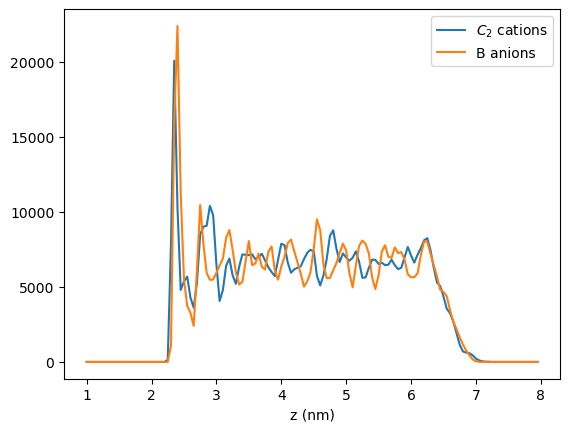

In [14]:
c_cat, bins = np.histogram(z_cat.flatten(), range=(1.0, 8.0), bins=140)
c_ani, bins = np.histogram(z_ani.flatten(), range=(1.0, 8.0), bins=140)

plt.plot(bins[:-1], c_cat, label='$C_2$ cations')
plt.plot(bins[:-1], c_ani, label='B anions')
plt.legend()
plt.xlabel('z (nm)')
plt.show()